In [ ]:
import pandas as pd

## Data Loading and Preparation

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Semester 7/anxiety_stress.csv")
df1 = pd.read_csv("/content/drive/MyDrive/Semester 7/normal_sentiment.csv")
'''
0 = Stress
1 = Depression
2 = Anxiety
3 = Normal
'''

'\n0 = Stress\n1 = Depression\n2 = Anxiety\n3 = Normal\n'

In [ ]:
df.drop('title', axis=1, inplace=True)

In [ ]:
condition = df[(df['target'] == 2) | (df['target'] == 3)]
df.drop(condition.index, inplace=True)

In [ ]:
df1.head()

,Unnamed: 0,statement,status
0,1120,Why do racers after the race immediately wear ...,Normal
1,6368,Nugas together from time to time...SD-SMP: at ...,Normal
2,4963,Indihouse why the hell,Normal
3,36078,@JonathanRKnight,Normal
4,3546,[HELP RT] WE FANBASE SHAKE RP! JOIN? FOLLOW FI...,Normal


In [ ]:



df1['status'] = df1['status'].replace({'Normal': 3})

<ipython-input-6-c004ca11c850>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['status'] = df1['status'].replace({'Normal': 3})


In [ ]:
df1.head()

,Unnamed: 0,statement,status
0,1120,Why do racers after the race immediately wear ...,3
1,6368,Nugas together from time to time...SD-SMP: at ...,3
2,4963,Indihouse why the hell,3
3,36078,@JonathanRKnight,3
4,3546,[HELP RT] WE FANBASE SHAKE RP! JOIN? FOLLOW FI...,3


In [ ]:
df1.rename(columns={'status': 'target', 'statement':'text'}, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1200 non-null   int64 
 1   text        1199 non-null   object
 2   target      1200 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.2+ KB


In [ ]:
df = pd.concat([df, df1], axis=0, ignore_index=True)

In [ ]:


df.head()

,Unnamed: 0,text,target
0,0,Welcome to /r/depression's check-in post - a p...,1
1,1,We understand that most people who reply immed...,1
2,2,Anyone else just miss physical touch? I crave ...,1
3,3,I’m just so ashamed. Everyone and everything f...,1
4,4,I really need a friend. I don't even have a si...,1


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:


df['target'].replace({4:2}, inplace=True)

<ipython-input-13-a527b328b0cf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['target'].replace({4:2}, inplace=True)


In [ ]:


df.head()

,text,target
0,Welcome to /r/depression's check-in post - a p...,1
1,We understand that most people who reply immed...,1
2,Anyone else just miss physical touch? I crave ...,1
3,I’m just so ashamed. Everyone and everything f...,1
4,I really need a friend. I don't even have a si...,1


In [ ]:



df['target'].value_counts()

,count
target,
1,1202
3,1200
2,1188
0,1181


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4771 entries, 0 to 4770
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4644 non-null   object
 1   target  4771 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 74.7+ KB


## Data Preprocessing

1. Lowercase and removal of stopwords
2. Removal of \ /
3. Remove content of brackets
4. Remove urls
5. Remove Punctuation
6. remove emojis

In [ ]:


import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove urls
    url_pattern = r'\b(?:https?://|www\.)\S+\b'
    text =  re.sub(url_pattern, '', text)

    # Remove round brackets with the content
    text = re.sub(r'\([^)]*\)', '', text)

    # Remove square brackets with the content
    text = re.sub(r'\[[^\]]*\]', '', text)

    # Special characters
    text = re.sub(r'[^a-zA-Z0-9\s]|r/|/','', text)

     # Remove Emojis
    emoji_pattern = re.compile(
        pattern = r"[\U0001F600-\U0001F64F]|"  # Emoticons
                  r"[\U0001F300-\U0001F5FF]|"  # Symbols & Pictographs
                  r"[\U0001F680-\U0001F6FF]|"  # Transport & Map Symbols
                  r"[\U0001F700-\U0001F77F]|"  # Alchemical Symbols
                  r"[\U0001F780-\U0001F7FF]|"  # Geometric Shapes Extended
                  r"[\U0001F800-\U0001F8FF]|"  # Supplemental Arrows-C
                  r"[\U0001F900-\U0001F9FF]|"  # Supplemental Symbols and Pictographs
                  r"[\U0001FA00-\U0001FA6F]|"  # Chess Symbols
                  r"[\U0001FA70-\U0001FAFF]|"  # Symbols and Pictographs Extended-A
                  r"[\U00002702-\U000027B0]|"  # Dingbats
                  r"[\U000024C2-\U0001F251]",  # Enclosed characters
        flags = re.UNICODE
    )
    text = emoji_pattern.sub('', text)

    # Removing unwanted blank spaces
    text =  ' '.join(text.split())

    # Remove stopwords
    tokens = word_tokenize(text)
    text = ' '.join([word for word in tokens if word not in stop_words])

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in tokens])


    return text



In [ ]:
df['text'] = df['text'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else '')

In [ ]:
df.head()

,text,target
0,welcome depression checkin post place take mom...,1
1,understand people reply immediately op invitat...,1
2,anyone else miss physical touch crave badly,1
3,im ashamed everyone everything feel far away e...,1
4,really need friend dont even single best frien...,1


In [ ]:
all_text = ' '.join(df['text'].to_list())

## Wordcloud Visualization

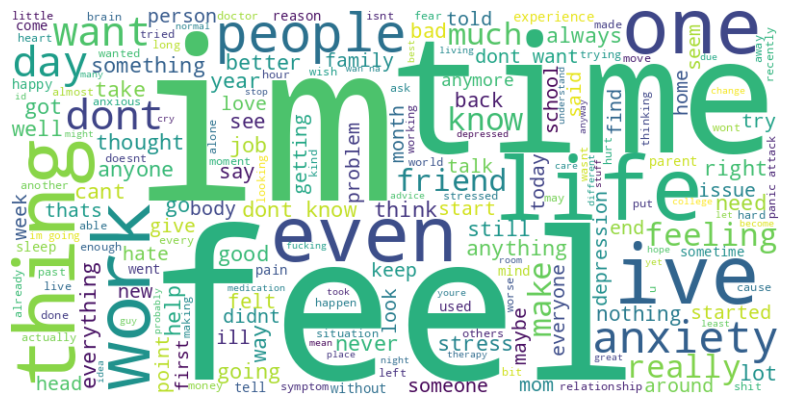

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df.head()

,text,target
0,welcome depression checkin post place take mom...,1
1,understand people reply immediately op invitat...,1
2,anyone else miss physical touch crave badly,1
3,im ashamed everyone everything feel far away e...,1
4,really need friend dont even single best frien...,1


In [ ]:

df.head()

,text,target
0,welcome depression checkin post place take mom...,1
1,understand people reply immediately op invitat...,1
2,anyone else miss physical touch crave badly,1
3,im ashamed everyone everything feel far away e...,1
4,really need friend dont even single best frien...,1


## Fine Tuning LLM Model

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AutoTokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
tokenizer2 = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=4)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.7 MB/s eta 0:00:00


In [ ]:
# Splitting dataset into train and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2)

In [ ]:
from datasets import Dataset

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

train_dataset = train_dataset.remove_columns(['__index_level_0__'])
test_dataset = test_dataset.remove_columns(['__index_level_0__'])

def tokenize_data(examples):
    def tokenize_function(examples):
        return tokenizer2(examples['text'], padding="max_length", truncation=True, max_length=50)

tokenized_train = train_dataset.map(tokenize_data, batched=True)
tokenized_test = test_dataset.map(tokenize_data, batched=True)

Map:   0%|          | 0/3816 [00:00<?, ? examples/s]

Map:   0%|          | 0/955 [00:00<?, ? examples/s]

In [ ]:
from transformers import DistilBertTokenizerFast

# Load the tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Function to tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

# Tokenize the train and validation datasets
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_test = test_dataset.map(tokenize_function, batched=True)

# Make sure to keep the labels (assuming your labels are in a column named 'target')
tokenized_train = tokenized_train.rename_column('target', 'labels')  # Rename for compatibility
tokenized_test = tokenized_test.rename_column('target', 'labels')      # Rename for compatibility

# Set the format for PyTorch (or TensorFlow)
tokenized_train.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
tokenized_test.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])


Map:   0%|          | 0/3816 [00:00<?, ? examples/s]

Map:   0%|          | 0/955 [00:00<?, ? examples/s]

In [ ]:
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

training_args = TrainingArguments(
    output_dir='./results',              # output directory
    eval_strategy="epoch",         # evaluate after each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    remove_unused_columns=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    data_collator=data_collator,
)


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,0.557201
2,No log,0.504250
3,0.687200,0.482693


TrainOutput(global_step=717, training_loss=0.6023236943754359, metrics={'train_runtime': 156.242, 'train_samples_per_second': 73.271, 'train_steps_per_second': 4.589, 'total_flos': 379135217147904.0, 'train_loss': 0.6023236943754359, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.48269274830818176,
 'eval_runtime': 3.6614,
 'eval_samples_per_second': 260.832,
 'eval_steps_per_second': 4.097,
 'epoch': 3.0}

In [ ]:
trainer.save_model('./results')

In [ ]:
import shutil

# Path to the folder you want to zip
folder_to_zip = '/content/results/checkpoint-717'

# Specify your desired output path for the zip file
output_zip = '/content/drive/MyDrive/Semester 7/checkpoint-717.zip'  # Change this path as needed

# Create the zip file
shutil.make_archive(output_zip.replace('.zip', ''), 'zip', folder_to_zip)


'/content/drive/MyDrive/Semester 7/checkpoint-717.zip'